# Projeto de Aprendizagem de Máquina

## *Partitioning fuzzy K-medoids clustering algorithms with relevance weight for each dissimilarity matrix estimated locally*

In [1]:
import pandas as pd
import numpy as np
import os
from tqdm import tqdm

from scipy.spatial.distance import pdist, squareform

from sklearn.preprocessing import MinMaxScaler
from scipy import stats

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.base import clone

from sklearn.neighbors import KernelDensity
from scipy.stats import gaussian_kde
from sklearn.base import BaseEstimator, ClassifierMixin

import matplotlib.pyplot as plt
import seaborn as sns

### Leitura dos dados

In [2]:
PATH = '../data/'

In [3]:
view1 = pd.read_csv(os.path.join(PATH, 'mfeat-fac'), sep='\s+', header=None)
view2 = pd.read_csv(os.path.join(PATH, 'mfeat-fou'), sep='\s+',  header=None)
view3 = pd.read_csv(os.path.join(PATH, 'mfeat-kar'), sep='\s+',  header=None)

#### View 1

In [4]:
print(view1.shape)
view1.head()

(2000, 216)


,0,1,2,3,4,5,6,7,8,9,...,206,207,208,209,210,211,212,213,214,215
0,98,236,531,673,607,647,2,9,3,6,...,474,536,628,632,18,36,8,15,12,13
1,121,193,607,611,585,665,7,9,2,4,...,520,458,570,634,15,32,11,13,15,11
2,115,141,590,605,557,627,12,6,3,3,...,535,498,572,656,20,35,16,14,13,6
3,90,122,627,692,607,642,0,6,4,5,...,576,549,628,621,16,35,7,12,15,9
4,157,167,681,666,587,666,8,6,1,4,...,594,525,568,653,16,35,10,15,13,13


In [5]:
view1.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,272.0515,91.275454,67.0,208.00,274.5,338.0,515.0
1,2000.0,322.7255,109.426588,81.0,247.00,324.0,406.0,565.0
2,2000.0,774.8245,140.141570,500.0,656.75,766.0,879.0,1264.0
3,2000.0,754.3390,109.173768,543.0,667.00,736.0,830.0,1134.0
4,2000.0,640.4605,48.940117,437.0,607.00,636.5,667.0,823.0
...,...,...,...,...,...,...,...,...
211,2000.0,21.5840,7.982343,1.0,16.00,23.0,27.0,38.0
212,2000.0,17.6120,5.884451,1.0,13.00,18.0,21.0,36.0
213,2000.0,11.9680,2.579788,4.0,10.00,12.0,14.0,18.0
214,2000.0,13.7045,1.985485,5.0,12.00,14.0,15.0,19.0


#### View 2

In [6]:
print(view2.shape)
view2.head()

(2000, 76)


,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
0,0.065882,0.197312,0.103826,0.270362,0.616078,0.035856,0.424572,0.089701,0.367773,0.037065,...,0.123448,0.113374,0.074343,0.281666,0.067795,0.344182,0.038963,0.394366,0.049971,0.344871
1,0.049142,0.175971,0.105515,0.227095,0.599280,0.041217,0.431078,0.096801,0.326739,0.059661,...,0.045310,0.069337,0.045386,0.254264,0.045447,0.335659,0.021719,0.445277,0.083978,0.354092
2,0.034172,0.227649,0.108766,0.127697,0.612494,0.056554,0.470639,0.041903,0.324267,0.044569,...,0.019858,0.218842,0.041087,0.360464,0.047154,0.377408,0.052099,0.445029,0.071234,0.261465
3,0.062336,0.217979,0.080243,0.289592,0.546316,0.045779,0.425545,0.022841,0.331454,0.119052,...,0.083995,0.085479,0.087658,0.151880,0.075950,0.293462,0.022675,0.408291,0.063010,0.401376
4,0.061970,0.198358,0.111239,0.253460,0.608455,0.023631,0.415246,0.091866,0.309310,0.049142,...,0.021004,0.106960,0.032283,0.248565,0.015674,0.386276,0.039481,0.434701,0.069218,0.405403


In [7]:
view2.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,0.185544,0.091898,0.004928,0.112066,0.176093,0.270290,0.395772
1,2000.0,0.377311,0.176231,0.009000,0.223410,0.401208,0.523692,0.771281
2,2000.0,0.269378,0.137980,0.005624,0.142086,0.288355,0.378611,0.665372
3,2000.0,0.265686,0.110694,0.010114,0.195214,0.255635,0.325003,0.748012
4,2000.0,0.300367,0.156256,0.002090,0.180421,0.282515,0.413297,0.796487
...,...,...,...,...,...,...,...,...
71,2000.0,0.166702,0.091240,0.007784,0.097974,0.149127,0.218640,0.457965
72,2000.0,0.230956,0.123441,0.003569,0.130623,0.232392,0.323222,0.601370
73,2000.0,0.267786,0.131009,0.011433,0.157886,0.251738,0.388339,0.620857
74,2000.0,0.143982,0.085663,0.001136,0.075864,0.130413,0.198687,0.510432


#### View 3

In [8]:
print(view3.shape)
view3.head()

(2000, 64)


,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,-10.297008,-11.666789,11.560669,-2.081316,4.044656,4.086815,-2.558072,-8.476935,2.138135,3.503082,...,1.078083,0.921927,0.496387,-0.643667,0.284104,0.286555,0.348625,1.814691,-1.351353,-0.473910
1,-5.036009,-12.885333,0.161155,0.592460,3.123534,4.220469,-6.411771,-6.335328,-0.244622,1.346073,...,0.942353,2.938791,1.429883,-2.336344,1.281628,-0.098321,0.582357,0.485792,0.642451,0.613107
2,-9.639157,-6.655898,0.388687,-1.717650,0.300346,3.400769,-7.240785,-1.659405,-0.874005,4.153403,...,-0.413174,-0.023028,-0.025265,1.259838,-0.441360,-0.960094,1.995843,1.097748,0.827182,-1.767840
3,-6.650375,-7.043851,4.104350,-2.342780,3.494658,3.924822,-9.874812,-6.556576,-1.364269,1.153308,...,-0.961236,-1.043815,-0.204508,-1.981150,0.982438,-0.144233,-1.449328,-0.913552,-0.771735,0.304992
4,-10.664524,-10.974133,0.194391,0.453885,2.193088,-3.304663,-8.376592,-4.241146,2.964818,-0.949622,...,0.152957,1.448160,-1.254907,-3.481295,-0.563889,1.529335,0.510399,0.298318,-0.943213,1.149847


In [9]:
view3.describe().T

,count,mean,std,min,25%,50%,75%,max
0,2000.0,-1.119422,7.691305,-16.459305,-7.606095,-1.744261,4.806998,15.774811
1,2000.0,-0.684916,5.716466,-15.651466,-4.660418,-0.539887,3.409475,15.414573
2,2000.0,1.325787,5.574310,-14.333107,-2.704140,2.023201,5.354117,14.769929
3,2000.0,1.635315,5.507581,-14.303563,-2.186702,0.830831,5.360159,16.824829
4,2000.0,2.891171,3.994073,-8.213110,0.020924,2.693554,5.692744,14.992364
...,...,...,...,...,...,...,...,...
59,2000.0,-0.204876,1.050156,-3.624762,-0.940669,-0.204553,0.498455,3.351974
60,2000.0,-0.017153,0.907965,-3.056478,-0.647365,0.007285,0.585359,2.974369
61,2000.0,-0.049707,0.899926,-3.279887,-0.666966,-0.058137,0.521300,2.809290
62,2000.0,0.239816,0.892344,-2.617629,-0.393474,0.229076,0.849849,3.145101


### Obter target

In [10]:
y = pd.Series([int(i / 200) for i in range(2000)], index=view1.index)

In [11]:
y = pd.read_csv('../clustering/results_multiviews/particao_crisp.csv', header=None, squeeze=True)

### Pré-processamento

#### Normalização (reescala)

In [12]:
scaler = MinMaxScaler()
view1 = scaler.fit_transform(view1)

scaler = MinMaxScaler()
view2 = scaler.fit_transform(view2)

scaler = MinMaxScaler()
view3 = scaler.fit_transform(view3)

### Dissimilaridade

In [13]:
# view1 = squareform(pdist(view1))
# view2 = squareform(pdist(view2))
# view3 = squareform(pdist(view3))

## Classificação

### Valicação cruzada com regra da soma

In [14]:
def fit(model, Xs, y):
    n_datasets = len(Xs)
    estimators = [clone(model) for _ in range(n_datasets)]
    
    for i in range(n_datasets):
        estimators[i].fit(Xs[i], y)
        
    return estimators

In [15]:
def predict(estimators, Xs):
    predictions = []
    
    n_datasets = len(Xs)
    
    for i in range(n_datasets):
        pred = estimators[i].predict_proba(Xs[i])
        predictions.append(pred)
        
    predictions = np.array(predictions)
    
    predictions = np.sum(predictions, axis=0)
    
    predictions = np.argmax(predictions, axis=1)
    
    return predictions

In [16]:
def fine_tuning(model, parameters, Xs_train, y_train, Xs_val, y_val, verbose=0):
    if verbose > 0:
        print('###########')
    
    n_datasets = len(Xs_train)
    
    results = []
    for key, values in parameters.items():
        for value in values:
            clf = model(**{key: value})
    
            estimators = fit(clf, Xs_train, y_train)
            pred = predict(estimators, Xs_val)

            result = accuracy_score(y_val, pred)
            results.append({key: value, 'acurácia': result})

    results_df = pd.DataFrame(results)
    
    best_result = results_df.sort_values('acurácia', ascending=False).iloc[0]
    best_params = best_result[list(parameters.keys())].convert_dtypes().to_dict()
    
    
    if verbose > 0:
        print('Resultados: ')
        print(results_df)
        print('Melhor resultado:')
        print(best_result['acurácia'])
        print('Melhores parâmetros:')
        print(best_params)

    return best_params

In [17]:
# best_params, results_df = fine_tuning(KNeighborsClassifier, {'n_neighbors': [1, 3, 5, 7, 9]}, [view1, view2], y, [view1, view2], y, 1)

In [18]:
# pd.DataFrame({'a': [0.4, 1.8]})['a'].convert_dtypes()

In [19]:
# best_result = results_df.sort_values('acurácia', ascending=False)
# best_result.loc[0, list(parameters.keys())].convert_dtypes()
# # best_result[list(parameters.keys())].to_dict()

In [20]:
def cross_val(model, parameters=None, verbose=0):
    predictions = []
    targets = []
    results = []
    kfold = StratifiedKFold(n_splits=10, shuffle=True)
    for train, test in kfold.split(y.index, y):
        
        best_param = None
        
        if parameters:
            ## Tuning
            
            train_aux, val = train_test_split(train, test_size=0.222)

            y_train = y[train_aux]
            y_val = y[val]

            view1_train = view1[train_aux]
            view2_train = view2[train_aux]
            view3_train = view3[train_aux]

            view1_val = view1[val]
            view2_val = view2[val]
            view3_val = view3[val]

            Xs_train = [view1_train, view2_train, view3_train]
            Xs_val = [view1_val, view2_val, view3_val]
            best_param = fine_tuning(KNeighborsClassifier, parameters, Xs_train, y_train, Xs_val, y_val, verbose)
        
        ## Validation
        y_train = y[train]
        y_test = y[test]

        view1_train = view1[train]
        view2_train = view2[train]
        view3_train = view3[train]

        view1_test = view1[test]
        view2_test = view2[test]
        view3_test = view3[test]
        
        Xs_train = [view1_train, view2_train, view3_train]
        Xs_test = [view1_test, view2_test, view3_test]
        
        if best_param:
            clf = model(**best_param)
        else:
            clf = model()
        
        estimators = fit(clf, Xs_train, y_train)
        pred = predict(estimators, Xs_test)
        
        predictions.extend(pred)
        targets.extend(y_test.values)
        

    results = accuracy_score(targets, predictions)
        
    return results

In [21]:
# n_experiments = 2
# results = []
# for i in tqdm(range(n_experiments)):
#     result = cross_val(KNeighborsClassifier, parameters)
#     results.append(result)

### Parzen Window

### Implementação da predição com janela de parzen

In [22]:
class KDEClassifier(BaseEstimator, ClassifierMixin):
    """Bayesian generative classification based on KDE
    
    Parameters
    ----------
    bandwidth : float
        the kernel bandwidth within each class
    kernel : str
        the kernel name, passed to KernelDensity
    """
    def __init__(self, bandwidth=1.0, kernel='gaussian'):
        self.bandwidth = bandwidth
        self.kernel = kernel
        
    def fit(self, X, y):
        self.classes_ = np.sort(np.unique(y))
        training_sets = [X[y == yi] for yi in self.classes_]
        self.models_ = [KernelDensity(bandwidth=self.bandwidth,
                                      kernel=self.kernel).fit(Xi)
                        for Xi in training_sets]
        self.logpriors_ = [np.log(Xi.shape[0] / X.shape[0])
                           for Xi in training_sets]
        return self
        
    def predict_proba(self, X):
        logprobs = np.array([model.score_samples(X)
                             for model in self.models_]).T
        result = np.exp(logprobs + self.logpriors_)
        return result / result.sum(1, keepdims=True)
        
    def predict(self, X):
        return self.classes_[np.argmax(self.predict_proba(X), 1)]

### Experimentos

In [23]:
n_experiments = 30

### Naive Bayes

In [24]:
model = GaussianNB

results_nb = []
for i in tqdm(range(n_experiments)):
    result = cross_val(model)
    results_nb.append(result)
results_nb

100%|██████████| 30/30 [00:04<00:00,  7.11it/s]


[0.7005,
 0.707,
 0.705,
 0.6995,
 0.7025,
 0.7035,
 0.7015,
 0.7005,
 0.704,
 0.704,
 0.7035,
 0.703,
 0.704,
 0.706,
 0.7045,
 0.707,
 0.702,
 0.7035,
 0.7035,
 0.7035,
 0.703,
 0.704,
 0.7025,
 0.703,
 0.7025,
 0.702,
 0.704,
 0.7015,
 0.703,
 0.7045]

### k-NN

In [25]:
parameters = {'n_neighbors': [1, 3, 5, 7, 9]}
model = KNeighborsClassifier

results_knn = []
for i in tqdm(range(n_experiments)):
    result = cross_val(model, parameters)
    results_knn.append(result)
results_knn

100%|██████████| 30/30 [07:55<00:00, 15.84s/it]


[0.7585,
 0.7525,
 0.7565,
 0.757,
 0.7485,
 0.754,
 0.7575,
 0.755,
 0.756,
 0.7525,
 0.7525,
 0.7525,
 0.7585,
 0.751,
 0.7545,
 0.7615,
 0.7555,
 0.7585,
 0.7565,
 0.7585,
 0.755,
 0.7545,
 0.7605,
 0.759,
 0.756,
 0.7585,
 0.7525,
 0.759,
 0.7605,
 0.7505]

### Janela de Parzen

In [26]:
parameters = {'bandwidth': [0.1, 0.3, 0.5, 1, 1.5, 2]}
model = KDEClassifier

results_parzen = []
for i in tqdm(range(n_experiments)):
    result = cross_val(model)
    results_parzen.append(result)
results_parzen

100%|██████████| 30/30 [01:22<00:00,  2.74s/it]


[0.674,
 0.674,
 0.6745,
 0.6755,
 0.6735,
 0.675,
 0.673,
 0.675,
 0.6775,
 0.6745,
 0.674,
 0.674,
 0.674,
 0.6725,
 0.678,
 0.6735,
 0.676,
 0.674,
 0.6755,
 0.673,
 0.674,
 0.6755,
 0.676,
 0.674,
 0.6765,
 0.674,
 0.675,
 0.673,
 0.674,
 0.6735]

### Box plot

In [27]:
results_df = pd.DataFrame(np.vstack((results_nb, results_knn, results_parzen)).T, columns=['Naive Bayes', 'k-NN', 'Parzen'])

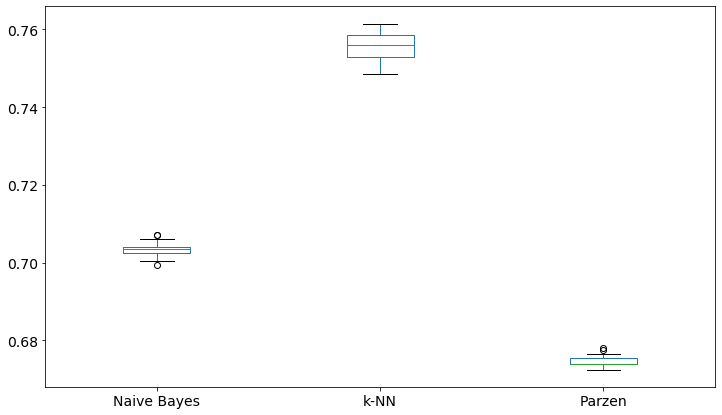

In [28]:
results_df.boxplot(figsize=(12,7), grid=False, fontsize=14)

### Friedman test

In [30]:
stat, p = stats.friedmanchisquare(results_nb, results_knn, results_parzen)

In [31]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('Distribuições iguais (falha em rejeitar H0)')
else:
    print('Distribuições diferentes (rejeita H0)')

Statistics=60.000, p=0.000
Distribuições diferentes (rejeita H0)


### Intervalo de confiança

In [32]:
def normality_test(sample, sample_name):
    stat, p = stats.shapiro(sample)
    alpha = 0.05
    if p > alpha:
        print(sample_name + ': segue a distribuição normal (falha em rejeitar H0)')
    else:
        print(sample_name + ' Não segue a distribuição normal (rejeita H0)')

In [36]:
normality_test(results_nb, 'NB')
normality_test(results_knn, 'k-NN')
normality_test(results_parzen, 'Parzen')

NB: segue a distribuição normal (falha em rejeitar H0)
k-NN: segue a distribuição normal (falha em rejeitar H0)
Parzen Não segue a distribuição normal (rejeita H0)


In [45]:
def mean_confidence_interval(results, sample_name):
    confidence_level = 0.95
    degrees_freedom = len(results) - 1
    sample_mean = np.mean(results)
    sample_standard_error = stats.sem(results)

    confidence_interval = stats.t.interval(confidence_level, degrees_freedom, sample_mean, sample_standard_error)

    print('### {} ###'.format(sample_name))
    print('Estimativa pontual:', sample_mean)
    print('Intervalo de confiaça:', confidence_interval)
    print('Confiança de {}%'.format(int(confidence_level*100)))
    print('\n')

In [46]:
mean_confidence_interval(results_nb, 'NB')
mean_confidence_interval(results_knn, 'k-NN')
mean_confidence_interval(results_parzen, 'Parzen')

### NB ###
Estimativa pontual: 0.7032833333333333
Intervalo de confiaça: (0.7026427686183639, 0.7039238980483026)
Confiança de 95%


### k-NN ###
Estimativa pontual: 0.7557833333333334
Intervalo de confiaça: (0.7545706964375075, 0.7569959702291592)
Confiança de 95%


### Parzen ###
Estimativa pontual: 0.6745500000000001
Intervalo de confiaça: (0.6740612898150281, 0.6750387101849721)
Confiança de 95%


